In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.manifold import TSNE

plt.style.use('dark_background')
sns.set_palette("Set1")

In [33]:
df = pd.read_csv('SDSS_Data.csv')

# Remove outliers for u, g, i, r, z
df = df[df['u'] > 0]
df = df[df['g'] > 0]
df = df[df['i'] > 0]
df = df[df['r'] > 0]
df = df[df['z'] > 0]

# Convert inf values to NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Features
df['g-r'] = df['g'] - df['r']
df['i-z'] = df['i'] - df['z']
df['u-r'] = df['u'] - df['r']
df['i-r'] = df['i'] - df['r']
df['z-r'] = df['z'] - df['r']

# Save as CSV
df.to_csv('SDSS_Data_F.csv', index=False)

In [34]:
imp_cols = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']

In [35]:
def tsne(df, features, target, p_list):
    labels = df[target].unique()
    
    if os.path.isdir('./data/model_dumps'):
        pass
    else:
        os.mkdir(path='./data/model_dumps')
    analysis = r'.\data\analysis_dumps'
    
    target_dict = {'QSO': 1, 'STAR': 2}
    X = df[features].values
    y = df[target].replace(to_replace=target_dict).values
    
    plt.figure(figsize=(15, 30))
    
    for (i, p) in zip(range(len(p_list)), p_list):
        tSNE_name = 'tSNE_{}.pkl'.format(p)
        tSNE_path = os.path.join(analysis, tSNE_name)

        xtSNE = TSNE(perplexity=p)

        if not os.path.isfile(path=tSNE_path):
            xtSNE_result = xtSNE.fit_transform(X=X)

            with open(file=tSNE_path, mode='wb') as m_pkl:
                pickle.dump(obj=xtSNE_result, file=m_pkl)
        else:
            with open(file=tSNE_path, mode='rb') as m_pkl:
                xtSNE_result = pickle.load(file=m_pkl)

        vis_x = xtSNE_result[:, 0]
        vis_y = xtSNE_result[:, 1]

        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        plt.scatter(x=vis_x, y=vis_y, c=y)
        plt.title(label='tSNE Perplexity: {}'.format(p), fontsize=10)
        plt.colorbar()
        plt.clim(vmin=1, vmax=len(labels))
        i += 1
    
    plt.show()

In [36]:
#tsne(df, imp_cols, 'class', [5, 50, 100, 500, 1000])

In [37]:
def distro(df, target):
    labels = df[target].unique()
    class_counts = df[target].value_counts()
    class_proportions = (class_counts / df.shape[0]) * 100

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct

    plt.pie(class_proportions, labels=labels, autopct=make_autopct(class_counts), startangle=140, explode=[0.1]*len(labels))
    plt.title('Class Distribution')

    plt.show()

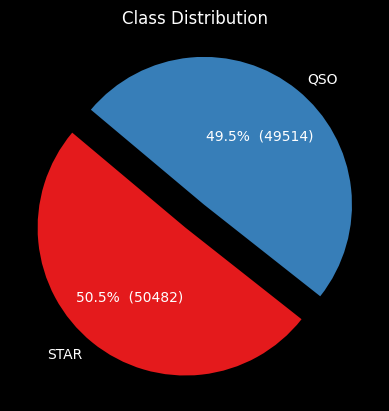

In [38]:
distro(df=df, target='class')

In [39]:
def pdf(df, features, target):
    plt.figure(figsize=(15, 30))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int(f'{len(features)}2{i+1}'))
        sns.kdeplot(data=df, x=feature, hue=target, fill=True)
        plt.title(label=f'PDF of {feature}', fontsize=10)
        plt.xlabel(xlabel='')
        i += 1
    plt.show()

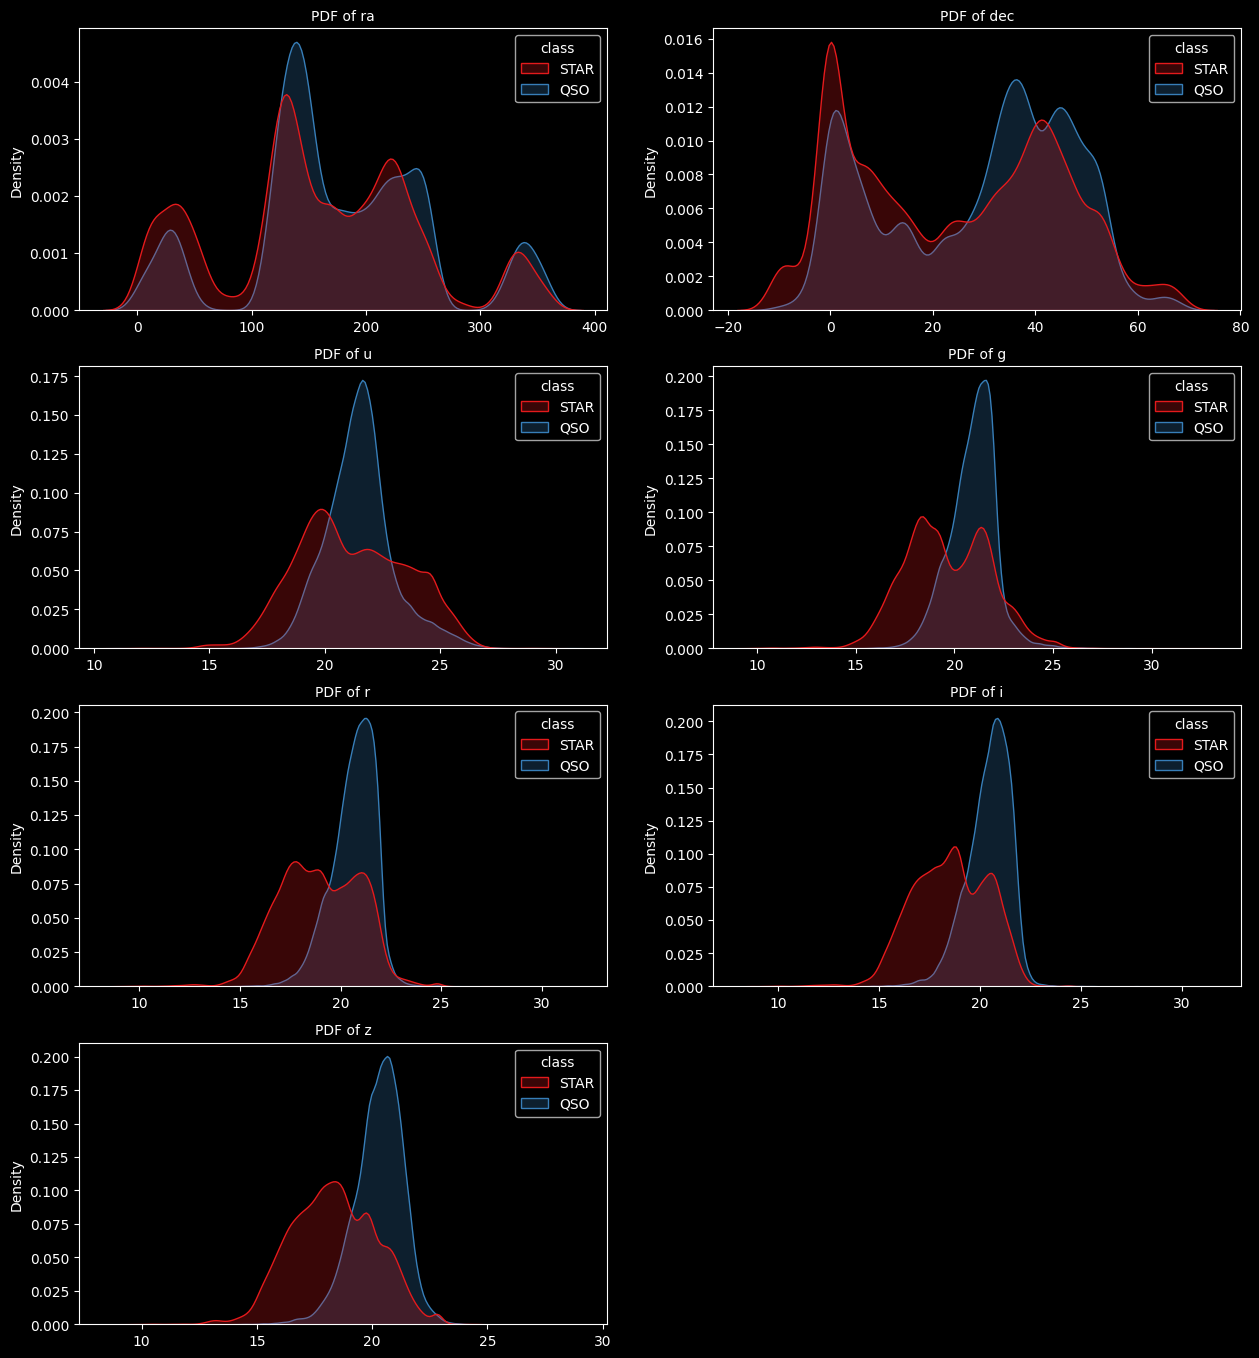

In [40]:
pdf(df=df, features=imp_cols, target='class')

In [41]:
def pairplot(df, features, target):
    sns.pairplot(data=df, vars=features, hue=target)
    plt.show()

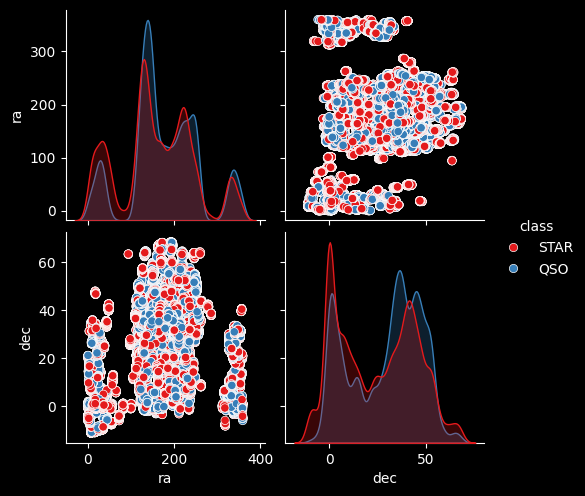

In [42]:
pairplot(df=df, features=['ra', 'dec'], target='class')